In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [9]:
# Normalisieren der Daten
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [14]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

In [15]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
regressor = Sequential()

regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))


regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
38/38 [==============================] - 1s 13ms/step - loss: 0.1782
Epoch 2/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0893
Epoch 3/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0537
Epoch 4/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0434
Epoch 5/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0407
Epoch 6/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0390
Epoch 7/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0373
Epoch 8/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0355
Epoch 9/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0336
Epoch 10/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0317
Epoch 11/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0297
Epoch 12/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0276
Epoch 13/200
38/38 [=====

38/38 [==============================] - 0s 12ms/step - loss: 3.6907e-04
Epoch 98/200
38/38 [==============================] - 0s 11ms/step - loss: 3.7540e-04
Epoch 99/200
38/38 [==============================] - 0s 11ms/step - loss: 3.7965e-04
Epoch 100/200
38/38 [==============================] - 0s 12ms/step - loss: 3.6855e-04
Epoch 101/200
38/38 [==============================] - 0s 11ms/step - loss: 3.6823e-04
Epoch 102/200
38/38 [==============================] - 0s 12ms/step - loss: 3.6536e-04
Epoch 103/200
38/38 [==============================] - 0s 12ms/step - loss: 3.6370e-04
Epoch 104/200
38/38 [==============================] - 0s 12ms/step - loss: 3.6433e-04
Epoch 105/200
38/38 [==============================] - 0s 11ms/step - loss: 3.6876e-04
Epoch 106/200
38/38 [==============================] - 0s 11ms/step - loss: 3.6477e-04
Epoch 107/200
38/38 [==============================] - 0s 12ms/step - loss: 3.6492e-04
Epoch 108/200
38/38 [==============================] - 0s 1

38/38 [==============================] - 0s 11ms/step - loss: 3.1100e-04
Epoch 192/200
38/38 [==============================] - 0s 10ms/step - loss: 3.1483e-04
Epoch 193/200
38/38 [==============================] - 0s 11ms/step - loss: 3.2205e-04
Epoch 194/200
38/38 [==============================] - 0s 10ms/step - loss: 3.1485e-04
Epoch 195/200
38/38 [==============================] - 0s 11ms/step - loss: 3.0928e-04
Epoch 196/200
38/38 [==============================] - 0s 10ms/step - loss: 3.1289e-04
Epoch 197/200
38/38 [==============================] - 0s 11ms/step - loss: 3.1251e-04
Epoch 198/200
38/38 [==============================] - 0s 11ms/step - loss: 3.1846e-04
Epoch 199/200
38/38 [==============================] - 0s 10ms/step - loss: 3.0908e-04
Epoch 200/200
38/38 [==============================] - 0s 11ms/step - loss: 3.0976e-04


In [21]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price = test_set.iloc[:,1:2].values

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [23]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 148ms/step


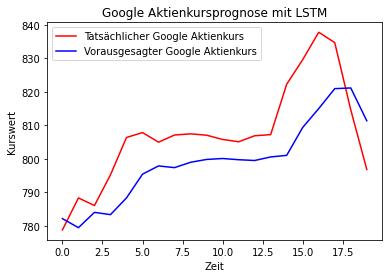

In [25]:
plt.plot(actual_stock_price, color = 'red', label = 'Tatsächlicher Google Aktienkurs')
plt.plot(predicted_stock_price, color = 'blue', label = 'Vorausgesagter Google Aktienkurs')
plt.title('Google Aktienkursprognose mit LSTM')
plt.xlabel('Zeit')
plt.ylabel('Kurswert')
plt.legend()